## Assignment 1
SPPH 500 - Ly Trinh

In [2]:
library(tidyverse)
library(stats)
# library(GGally) #not that useful

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Question 2
In this question, we will examine salary discrimination amongst tenure-track professors in a small Mid-western college in the United States.  The data consists of information on 52 faculty members, and were initially collected for presentation in legal proceedings for which discrimination against women in salary was at issue (recorded some time prior to 1980).  The data were collected from personnel files, and consist of the following variables (note, some variables have been removed from the dataset we will work with).  The data is saved in the file SalaryData.txt 
 
sex = recorded as “male” and “female” /
degree = the highest degree obtained, recorded as “doctorate” and “masters” /
yearsdeg = the number of years since the degree was earned /
salary = academic salary in U.S. dollars /
rank = academic rank, recorded as “full”, “associate” and “assistant”
 
In question 2, we will work through an analysis of this data.  In question 3, we will write up the findings.   

In [3]:
SalaryData <- read.delim('./SalaryData.txt', header=T, sep="")
head(SalaryData)

sex,degree,yearsdeg,salary,rank
male,doctorate,35,36350,full
male,doctorate,22,35350,full
male,doctorate,23,28200,full
female,doctorate,27,26775,full
male,masters,30,33696,full
male,doctorate,21,28516,full


#### (a)  Initial variable examination: 
Examine each variable on its own.  Examine all relevant bivariate relationships.  You do NOT need to include this with your submitted-assignment, but you should examine the data a bit before getting started on analysis. 

In [4]:
summary(SalaryData)

     sex           degree      yearsdeg         salary             rank   
 female:14   doctorate:36   Min.   : 1.00   Min.   :15000   assistant:17  
 male  :38   masters  :16   1st Qu.: 7.00   1st Qu.:19169   associate:15  
                            Median :15.00   Median :23713   full     :20  
                            Mean   :16.29   Mean   :23957                 
                            3rd Qu.:23.25   3rd Qu.:27259                 
                            Max.   :35.00   Max.   :38045                 

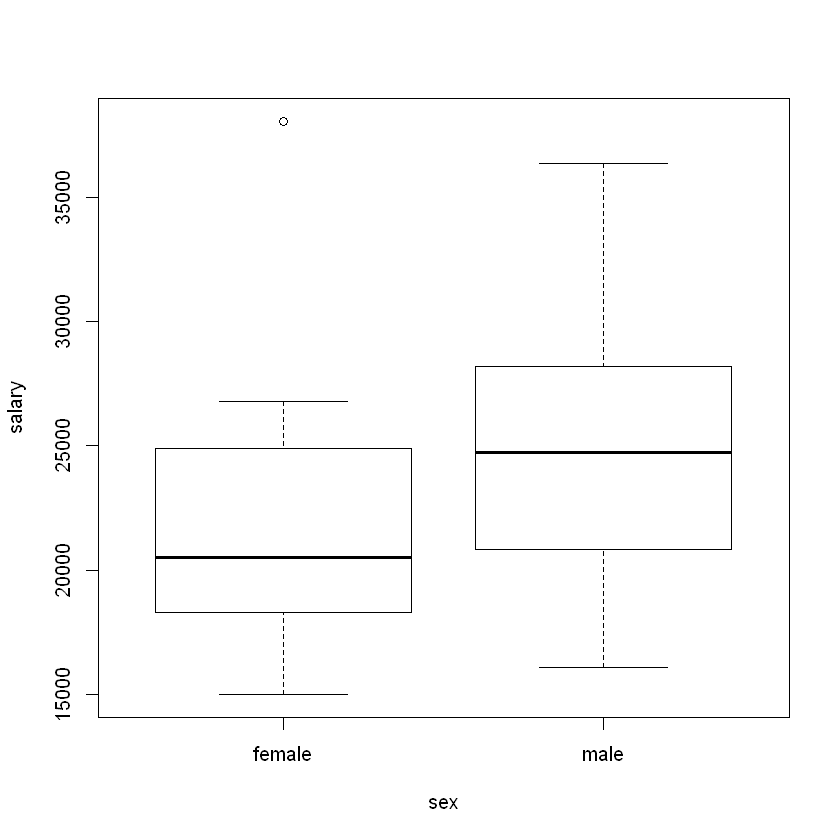

In [5]:
boxplot(salary~sex, data=SalaryData)

There is one outlier in female salary. Explore whether to remove it.

In [6]:
SalaryData %>%
    filter(sex=="female") %>%
    arrange(desc(salary))

sex,degree,yearsdeg,salary,rank
female,doctorate,24,38045,full
female,doctorate,27,26775,full
female,doctorate,16,25500,full
female,masters,32,24900,full
female,masters,29,22450,associate
female,masters,15,21600,assistant
female,masters,33,20690,associate
female,doctorate,2,20300,assistant
female,doctorate,6,19150,assistant
female,doctorate,15,19140,assistant


Likely a data entry error, remove.

In [7]:
SalaryData <- SalaryData[-which(SalaryData$salary==max(SalaryData$salary[SalaryData$sex=='female'])),]

In [8]:
with(SalaryData, by(salary, sex, mean))

sex: female
[1] 20449.62
------------------------------------------------------------ 
sex: male
[1] 24786.13

In [9]:
with(SalaryData, by(salary, sex, sd))

sex: female
[1] 3748.387
------------------------------------------------------------ 
sex: male
[1] 5558.507

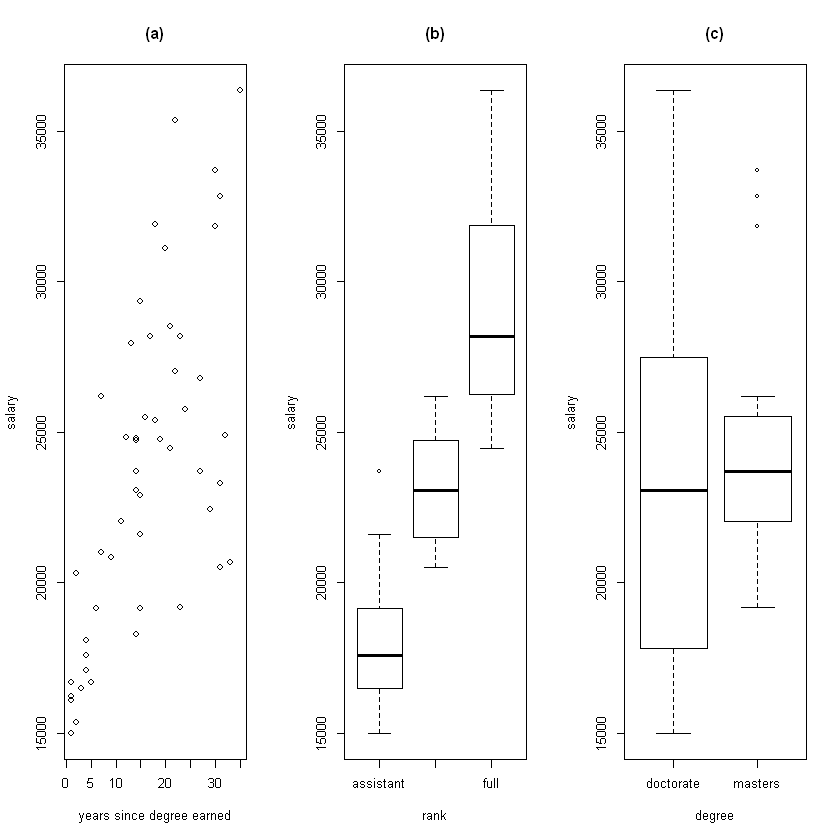

In [10]:
#pairwise plots with salary
par(mfrow=c(1,3))
plot(salary~yearsdeg, data=SalaryData, xlab="years since degree earned", main="(a)")
boxplot(salary~rank,data=SalaryData, main="(b)")
boxplot(salary~degree, data=SalaryData, main="(c)")
par(mfrow=c(1,1))

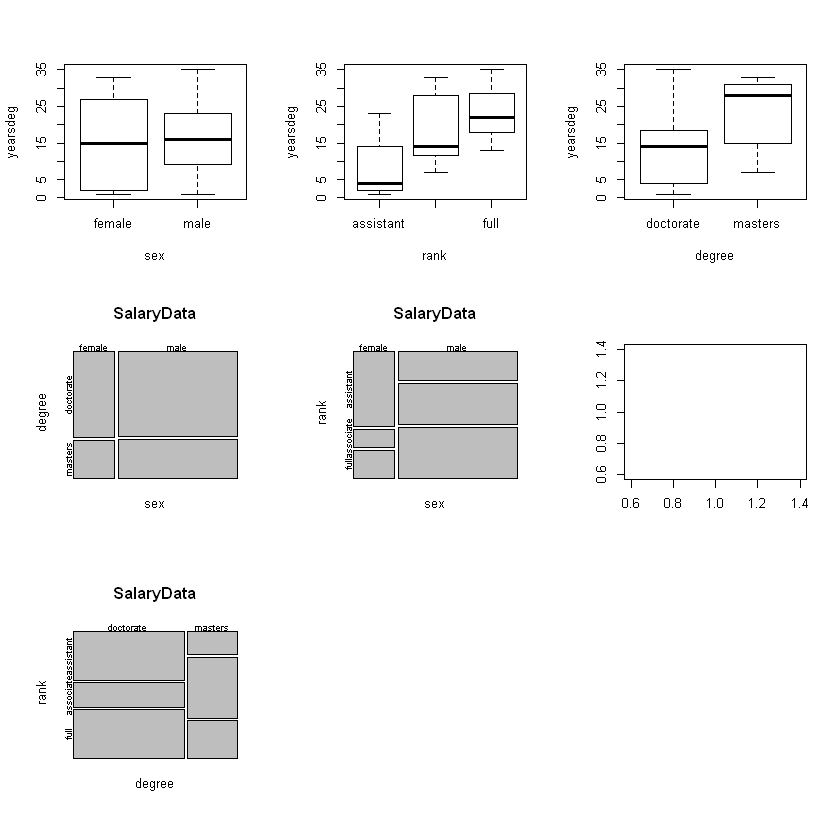

In [11]:
#plots between pairs of predictors
par(mfrow=c(3,3))
boxplot(yearsdeg~sex, data=SalaryData)
boxplot(yearsdeg~rank, data=SalaryData)
boxplot(yearsdeg~degree, data=SalaryData)
mosaicplot(sex~degree, data=SalaryData)
mosaicplot(sex~rank, data=SalaryData)
plot(1, type="n", xlab="", ylab="")
mosaicplot(degree~rank, data=SalaryData)
par(mfrow=c(1,1))

Sex assoc w/ rank. Yearsdeg assoc w/ rank and degree.


Years since degree earned and degree dont' seem to differ by sex.

#### (b) Unadjusted effect

In [12]:
#t-test of salary by sex
x <- t.test(salary~sex, data=SalaryData)
x


	Welch Two Sample t-test

data:  salary by sex
t = -3.1511, df = 31.132, p-value = 0.003582
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7142.777 -1530.256
sample estimates:
mean in group female   mean in group male 
            20449.62             24786.13 


In [13]:
#difference in group means
diff(x$estimate)

mean in group male 
          4336.516

#### (c) Adjusted effect
Fit a model to test if the mean salary for the sexes differs, adjusting for degree, years since degree and rank.  What do you conclude here? 

In [14]:
fit1 <- lm(salary~., data=SalaryData)
summary(fit1)


Call:
lm(formula = salary ~ ., data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5038.0 -1501.3  -518.2  1873.8  5992.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16266.71     932.98  17.435  < 2e-16 ***
sexmale        1894.19     930.36   2.036   0.0477 *  
degreemasters   239.02    1083.29   0.221   0.8264    
yearsdeg        108.06      67.36   1.604   0.1157    
rankassociate  3054.65    1193.65   2.559   0.0139 *  
rankfull       8818.81    1433.92   6.150 1.87e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2634 on 45 degrees of freedom
Multiple R-squared:  0.791,	Adjusted R-squared:  0.7678 
F-statistic: 34.07 on 5 and 45 DF,  p-value: 3.13e-14


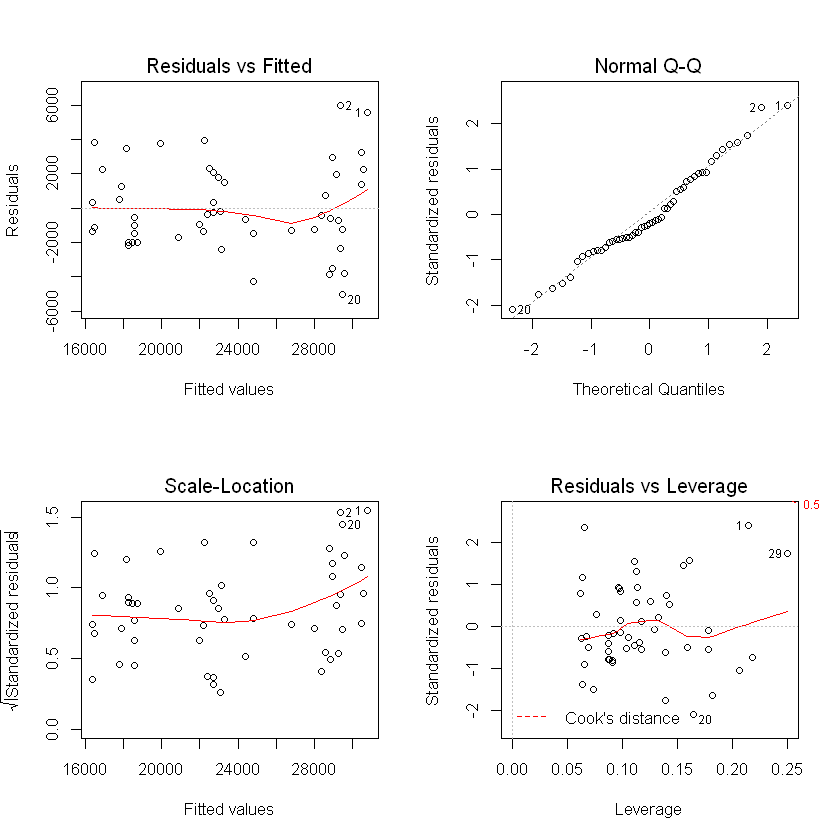

In [15]:
par(mfrow=c(2,2))
plot(fit1)
par(mfrow=c(1,1))

#### (d) Variables to Include: 
Recall, our question of interest is whether or not there exists a difference in mean salaries for males and females.  Compare a model that uses only the variable ‘sex’ to a model that uses ‘sex’ and ‘yearsdeg’.  Do you believe the variable ‘yearsdeg’ should be included in the model?  Make sure to justify your answer.   

In [16]:
fit2a <- lm(salary~sex, data=SalaryData)
summary(fit2a)


Call:
lm(formula = salary ~ sex, data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8692.1 -3775.4   -44.1  3413.9 11563.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    20450       1435  14.250   <2e-16 ***
sexmale         4336       1662   2.608    0.012 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5174 on 49 degrees of freedom
Multiple R-squared:  0.1219,	Adjusted R-squared:  0.104 
F-statistic: 6.804 on 1 and 49 DF,  p-value: 0.01202


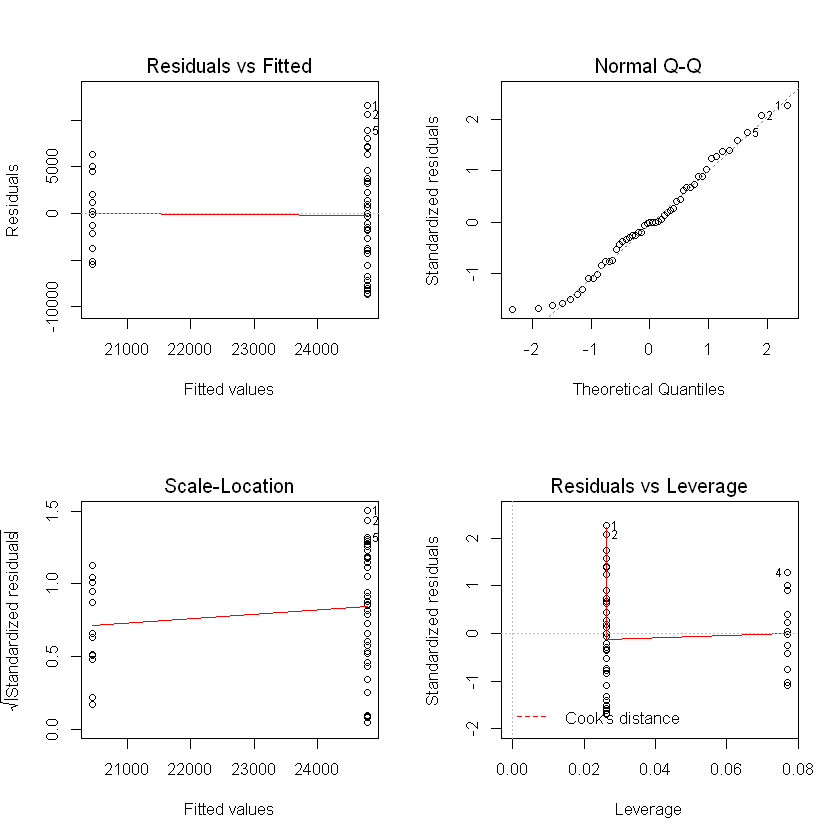

In [17]:
par(mfrow=c(2,2))
plot(fit2a)
par(mfrow=c(1,1))

In [18]:
fit2b <- update(fit2a, ~. + yearsdeg)
summary(fit2b)


Call:
lm(formula = salary ~ sex + yearsdeg, data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9285.5 -2102.5  -449.8  2288.7  8675.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15277.16    1321.46  11.561 1.78e-15 ***
sexmale      3732.80    1227.23   3.042  0.00381 ** 
yearsdeg      348.40      53.48   6.514 4.09e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3809 on 48 degrees of freedom
Multiple R-squared:  0.5339,	Adjusted R-squared:  0.5145 
F-statistic:  27.5 on 2 and 48 DF,  p-value: 1.103e-08


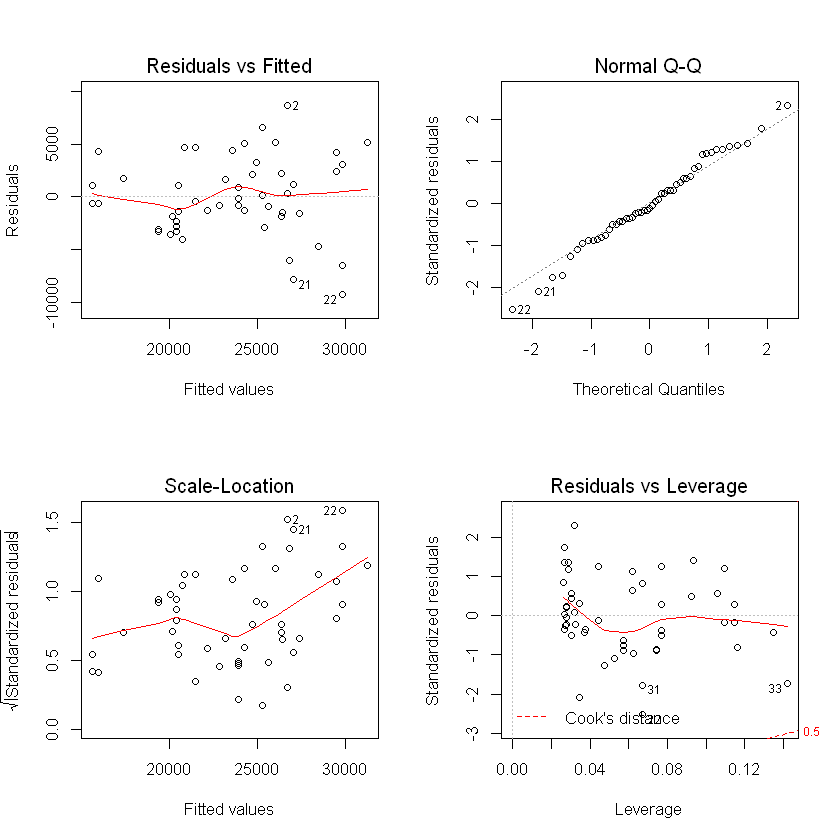

In [19]:
par(mfrow=c(2,2))
plot(fit2b)
par(mfrow=c(1,1))

In [20]:
anova(fit2a, fit2b)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
49,1311793683,NA,NA,NA,NA
48,696255967,1,615537717,42.43527,4.089799e-08


#### (e)  Variables to Include: 
Consider adding the variable ‘degree’ to the model that includes sex and yearsdeg.  Do you think this variable should be added into our model?  Why or why not? 

In [21]:
# model with degree is in part (f). No need to add here.

#### (f) Multiple Regression Model:  
Regardless of your findings from the previous questions, we will now work with a model that includes the variables ‘sex’, ‘yearsdeg’ and ‘degree’ as explanatory/predictor variables.  Fit this model, and report and interpret the regression coefficient for the variable ‘sex’, as well as a 95% confidence interval for it.  Also, report and interpret the coefficient of determination. 

In [22]:
fit3 <- update(fit2b, ~ . + degree)
summary(fit3)


Call:
lm(formula = salary ~ sex + yearsdeg + degree, data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8205.6 -2587.0  -518.4  2965.7  7745.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15089.48    1253.51  12.038  5.8e-16 ***
sexmale        3619.79    1162.97   3.113  0.00315 ** 
yearsdeg        428.93      59.65   7.191  4.2e-09 ***
degreemasters -3275.60    1281.94  -2.555  0.01391 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3607 on 47 degrees of freedom
Multiple R-squared:  0.5908,	Adjusted R-squared:  0.5647 
F-statistic: 22.62 on 3 and 47 DF,  p-value: 3.29e-09


In [23]:
confint(fit3)

,2.5 %,97.5 %
(Intercept),12567.7443,17611.2255
sexmale,1280.1959,5959.3775
yearsdeg,308.9299,548.9363
degreemasters,-5854.5397,-696.6585


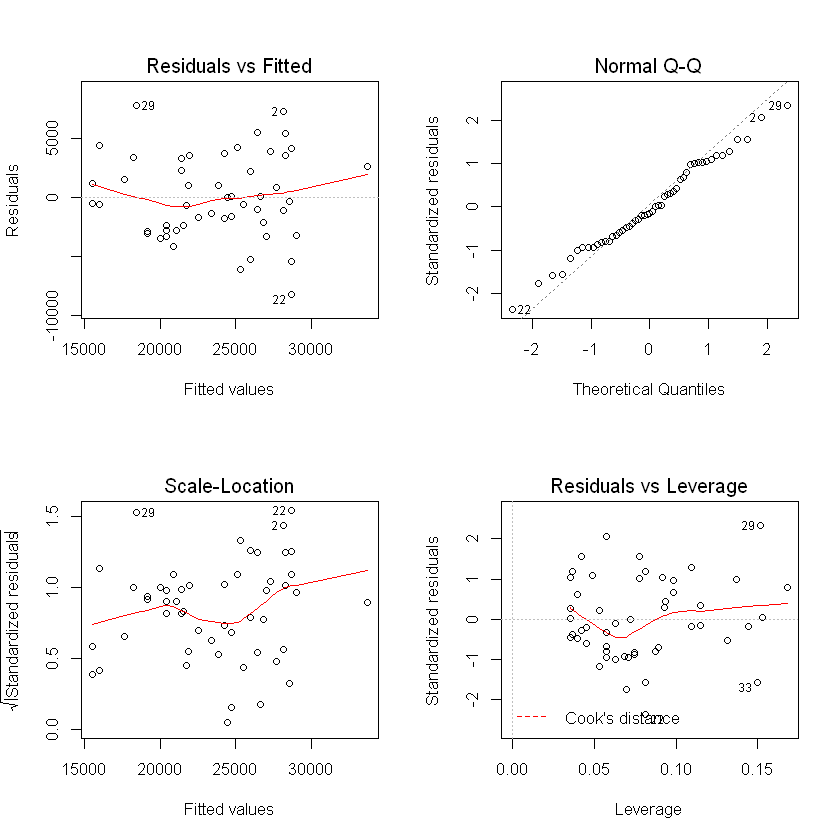

In [24]:
par(mfrow=c(2,2))
plot(fit3)
par(mfrow=c(1,1))
#linear, but not equal variance or normal

#### (g)  Effect Modifiers:  
Fit and compare models, to decide if the effect of the variable ‘sex’ on ‘salary’ is modified by either ‘yearsdeg’ or ‘degree’.  Summarize your findings in a neat and concise way, and state which, if any, effect modification (interaction) terms you believe should be included in the model, and why. 

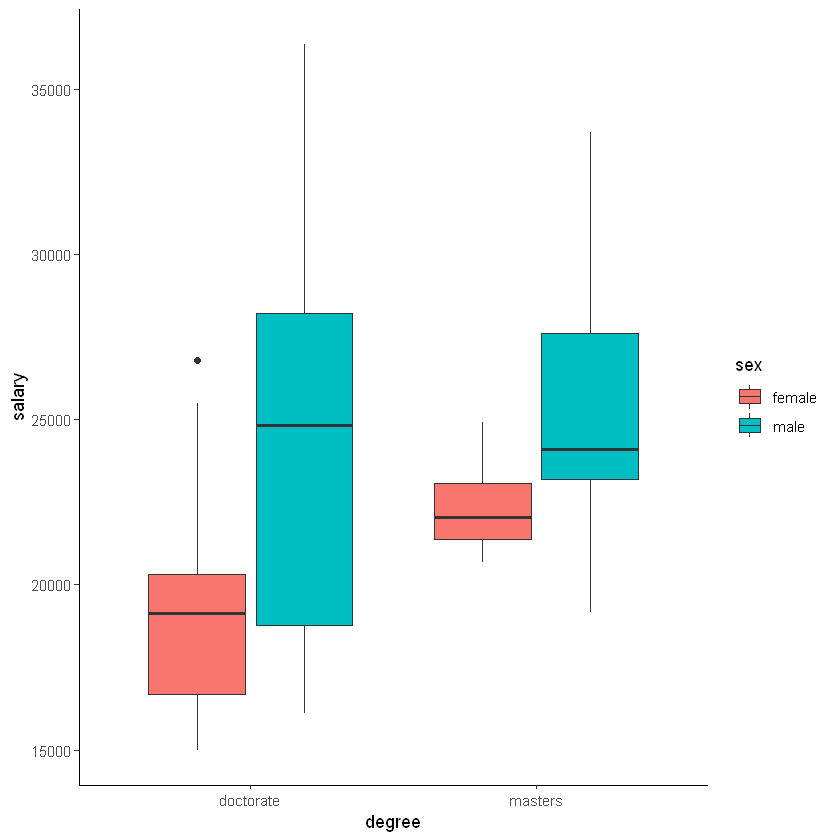

In [42]:
SalaryData %>%
ggplot() +
geom_boxplot(aes(degree, salary, fill=sex)) +
theme_classic()
#salaries are more different between sexes in masters?

`geom_smooth()` using formula 'y ~ x'


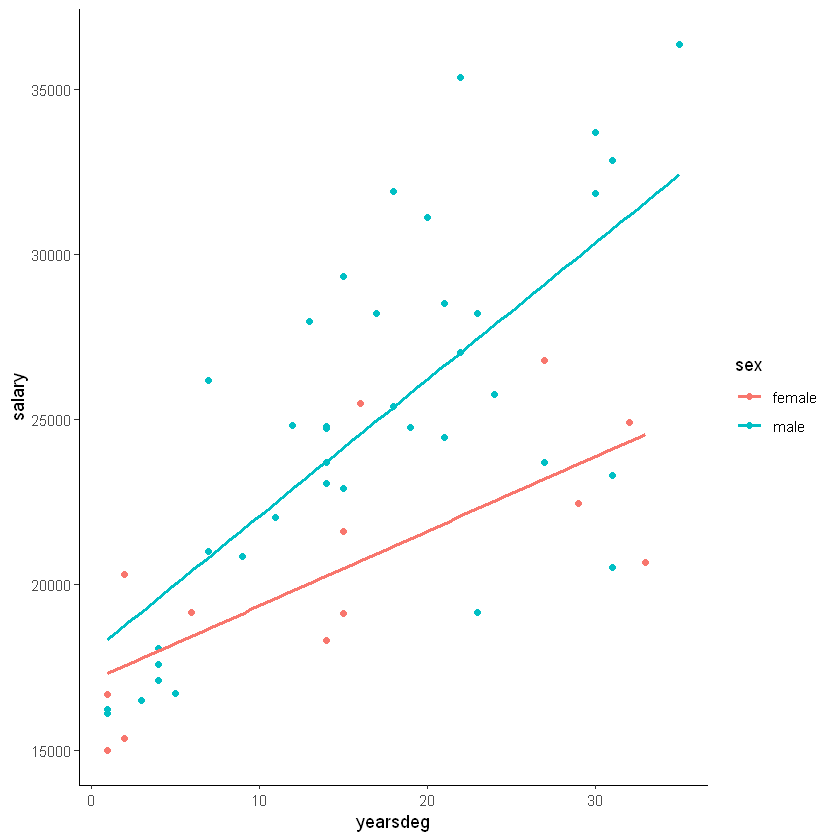

In [43]:
#checking sex-yearsdeg interation
SalaryData %>%
    ggplot(aes(yearsdeg, salary, color=sex))+
    geom_point()+
    geom_smooth(method="lm", se=F)+
    theme_classic()
#seems like there's an interaction, not sure if significant

In [27]:
#new linear models with interaction terms
#MLR with sex:degree interaction
fit4_deg <- update(fit3, ~. + sex:degree)
summary(fit4_deg)


Call:
lm(formula = salary ~ sex + yearsdeg + degree + sex:degree, data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8659.3 -2568.8  -471.4  2775.7  7555.3 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           15472.59    1333.90  11.599 2.96e-15 ***
sexmale                2918.46    1423.92   2.050   0.0461 *  
yearsdeg                439.90      61.17   7.192 4.70e-09 ***
degreemasters         -5049.89    2434.03  -2.075   0.0436 *  
sexmale:degreemasters  2206.19    2569.96   0.858   0.3951    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3617 on 46 degrees of freedom
Multiple R-squared:  0.5972,	Adjusted R-squared:  0.5622 
F-statistic: 17.05 on 4 and 46 DF,  p-value: 1.214e-08


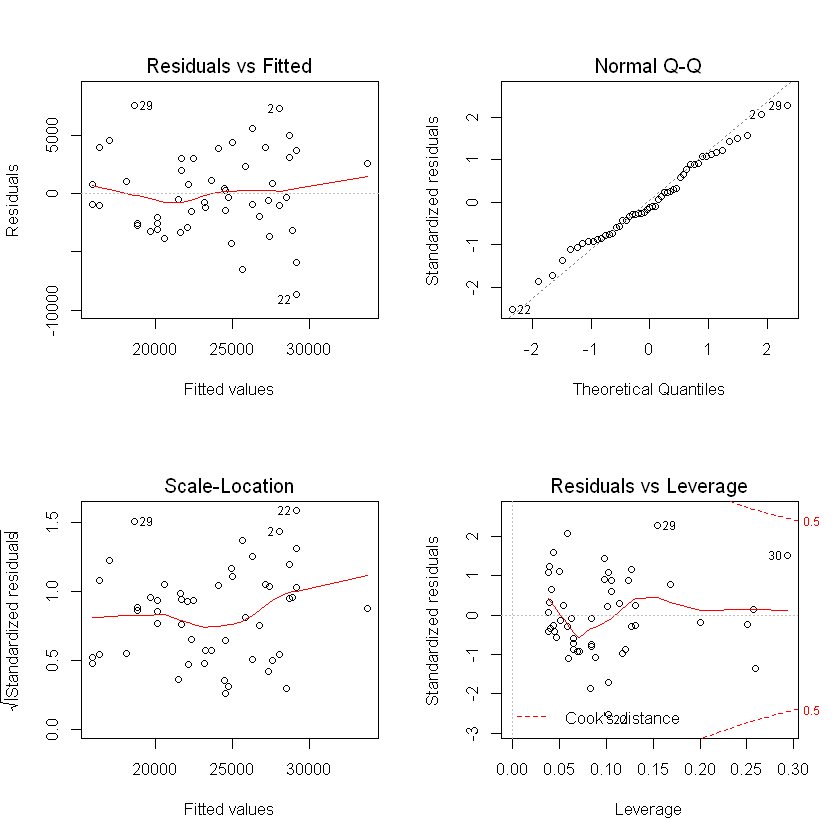

In [28]:
par(mfrow=c(2,2))
plot(fit4_deg)
par(mfrow=c(1,1))

In [29]:
#MLR with sex:yearsdeg interaction
fit4_years <- update(fit3, ~. + sex:yearsdeg)
summary(fit4_years)


Call:
lm(formula = salary ~ sex + yearsdeg + degree + sex:yearsdeg, 
    data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9103.2 -2105.2  -329.7  2516.9  8190.2 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      16742.26    1598.46  10.474 9.14e-14 ***
sexmale            997.84    1978.85   0.504  0.61649    
yearsdeg           314.84      91.53   3.440  0.00125 ** 
degreemasters    -3142.29    1262.88  -2.488  0.01652 *  
sexmale:yearsdeg   170.01     104.73   1.623  0.11136    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3545 on 46 degrees of freedom
Multiple R-squared:  0.613,	Adjusted R-squared:  0.5793 
F-statistic: 18.21 on 4 and 46 DF,  p-value: 4.979e-09


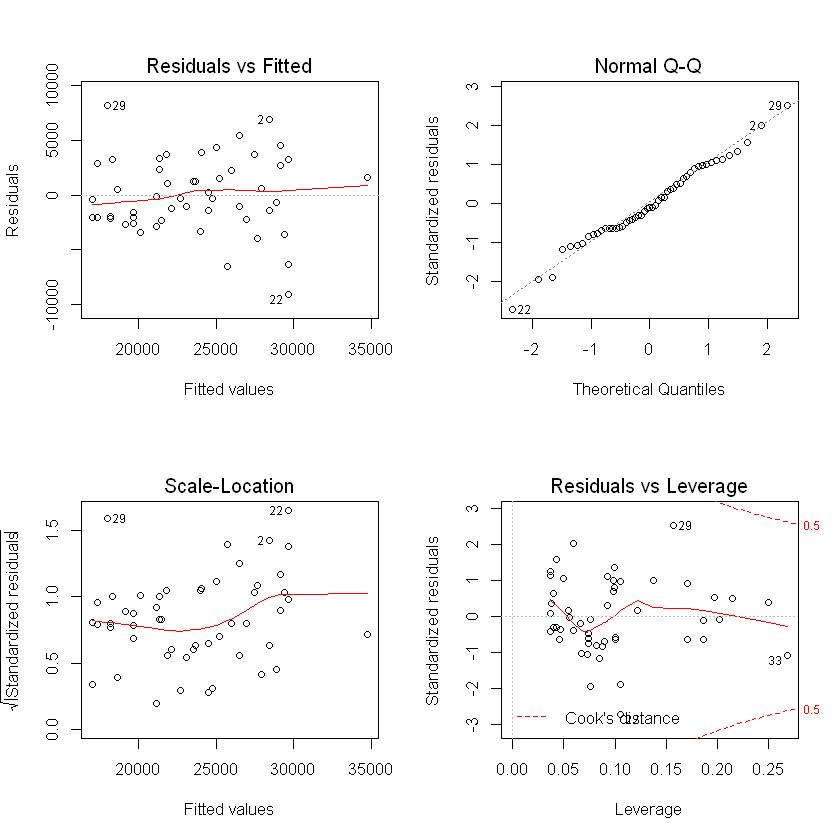

In [30]:
par(mfrow=c(2,2))
plot(fit4_years)
par(mfrow=c(1,1))

In [31]:
AIC(fit4_deg)
AIC(fit4_years)

[1] 987.1869

[1] 985.1565

In [32]:
BIC(fit4_deg)
BIC(fit4_years)

[1] 998.7778

[1] 996.7474

Both models still violate the homocedasticity and normality assumptions and neither explains the variability in salaries very well (only 56-57%). 

In [33]:
anova(fit3, fit4_deg)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
47,611333419,NA,NA,NA,NA
46,601694022,1,9639397,0.7369398,0.3950941


In [34]:
anova(fit3, fit4_years)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
47,611333419,NA,NA,NA,NA
46,578210222,1,33123197,2.635144,0.1113568


The interaction term is insignificant in both models and there is hardly any increase in R-squared. Model violations are not corrected. We stick with the model 3, without any interaction.

#### (h) Final model

Now that we have decided on a final model, state the regression assumptions, and whether or not you think they are met.   Make sure to justify your answers. For any assumption that is not met, state what we might consider trying in order to “fix the problem”.  You do not have to carry through with making these changes in order to satisfy assumptions.  You may simply state what changes we might consider making.

In [35]:
# final model: fit3
summary(fit3)


Call:
lm(formula = salary ~ sex + yearsdeg + degree, data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8205.6 -2587.0  -518.4  2965.7  7745.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15089.48    1253.51  12.038  5.8e-16 ***
sexmale        3619.79    1162.97   3.113  0.00315 ** 
yearsdeg        428.93      59.65   7.191  4.2e-09 ***
degreemasters -3275.60    1281.94  -2.555  0.01391 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3607 on 47 degrees of freedom
Multiple R-squared:  0.5908,	Adjusted R-squared:  0.5647 
F-statistic: 22.62 on 3 and 47 DF,  p-value: 3.29e-09


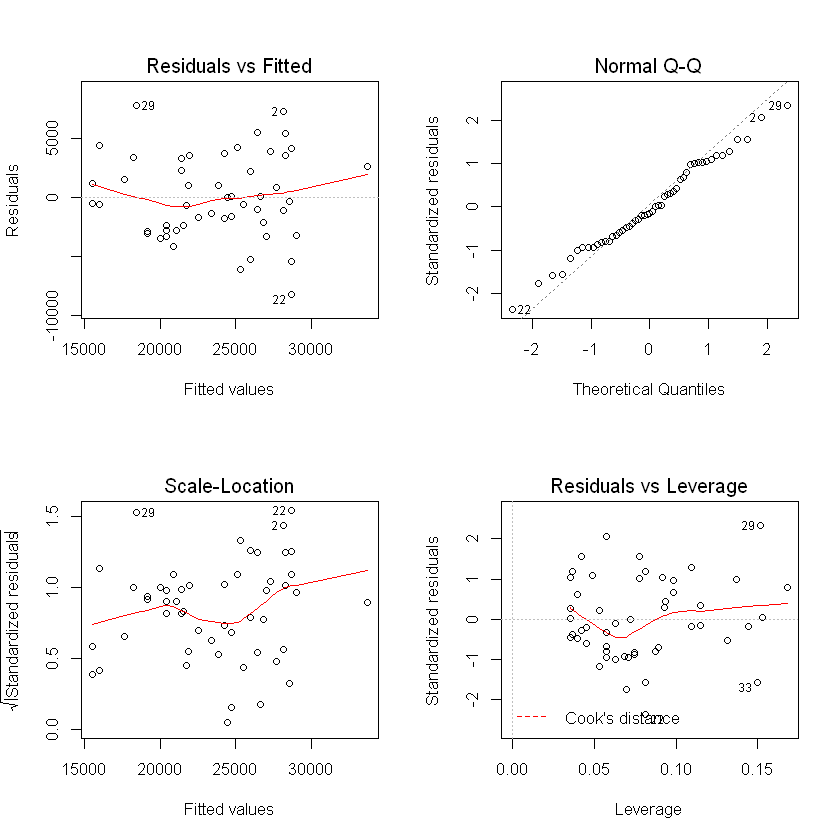

In [36]:
par(mfrow=c(2,2))
plot(fit3)
par(mfrow=c(1,1))

In [37]:
#normality test for residuals
shapiro.test(fit3$residuals)


	Shapiro-Wilk normality test

data:  fit3$residuals
W = 0.98584, p-value = 0.798


In [38]:
#how to theoretically fix heteroscedasticity
# try log model
fit3b <- update(fit3, log(salary) ~ .)
summary(fit3b)


Call:
lm(formula = log(salary) ~ sex + yearsdeg + degree, data = SalaryData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34268 -0.10554 -0.00463  0.11361  0.33917 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.676783   0.052058 185.886  < 2e-16 ***
sexmale        0.152206   0.048297   3.151  0.00283 ** 
yearsdeg       0.018268   0.002477   7.374 2.22e-09 ***
degreemasters -0.123203   0.053238  -2.314  0.02508 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1498 on 47 degrees of freedom
Multiple R-squared:  0.606,	Adjusted R-squared:  0.5808 
F-statistic:  24.1 on 3 and 47 DF,  p-value: 1.368e-09


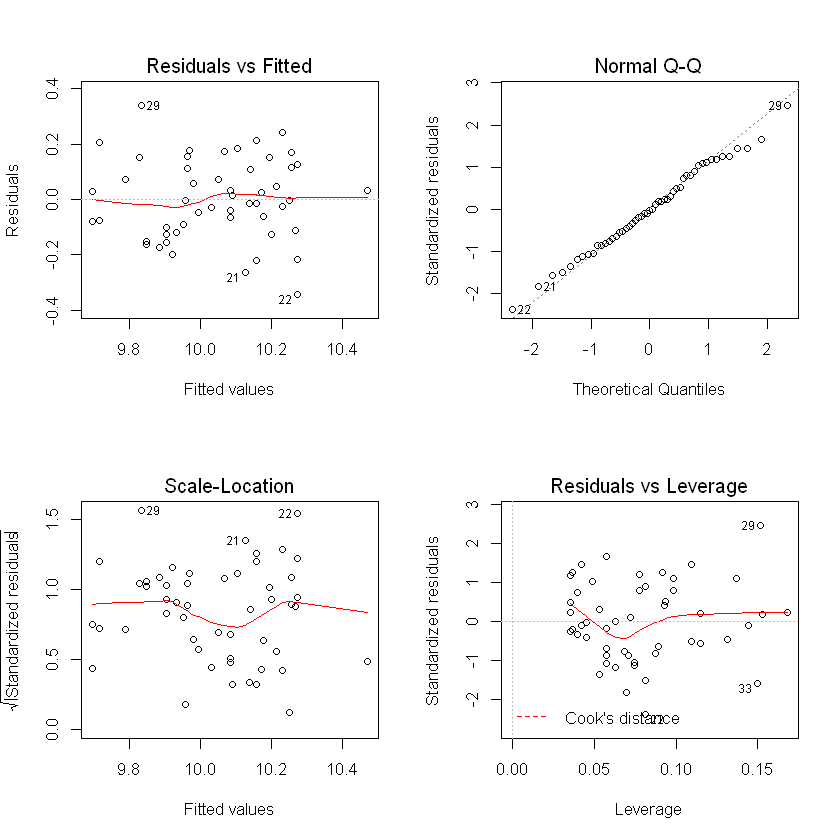

In [39]:
par(mfrow=c(2,2))
plot(fit3b)
par(mfrow=c(1,1))